## Predicting Stock Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28/09/18,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27/09/18,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26/09/18,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25/09/18,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24/09/18,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
data_train = data.iloc[:, 1:2]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)

In [11]:
data_train_scaled[:5]

array([[1.73343974],
       [1.74371669],
       [1.85573548],
       [1.71802431],
       [1.72316279]])

In [12]:
train_X = list()
train_y = list()
for i in range(60, data_train_scaled.shape[0]):
    train_X.append(data_train_scaled[i-60:i, 0])
    train_y.append(data_train_scaled[i,0])

In [15]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [32]:
import tensorflow as tf

forecasting_model = tf.keras.models.Sequential()
forecasting_model.add(tf.keras.layers.Input(shape=(60,1)))
forecasting_model.add(tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(50)))
forecasting_model.add(tf.keras.layers.Dense(1))

forecasting_model.compile(loss='mean_squared_error', optimizer='Adam')

In [33]:
forecasting_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rnn_3 (RNN)                     │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = forecasting_model.fit(train_X, train_y, epochs=100, callbacks=[earlystopping])

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2186
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059
Epoc

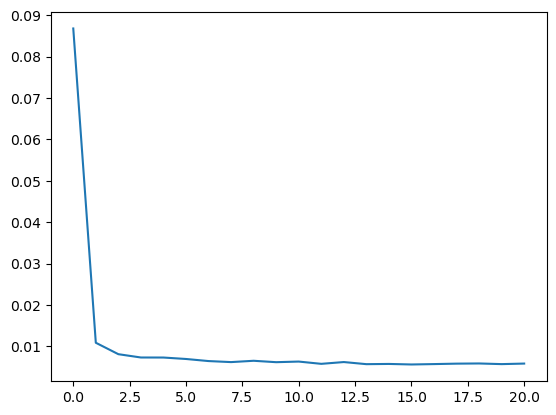

In [36]:
plt.plot(history.history['loss'])

In [43]:
pred = scaler.inverse_transform(forecasting_model.predict(train_X))
actual_y = scaler.inverse_transform(train_y.reshape(-1,1))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


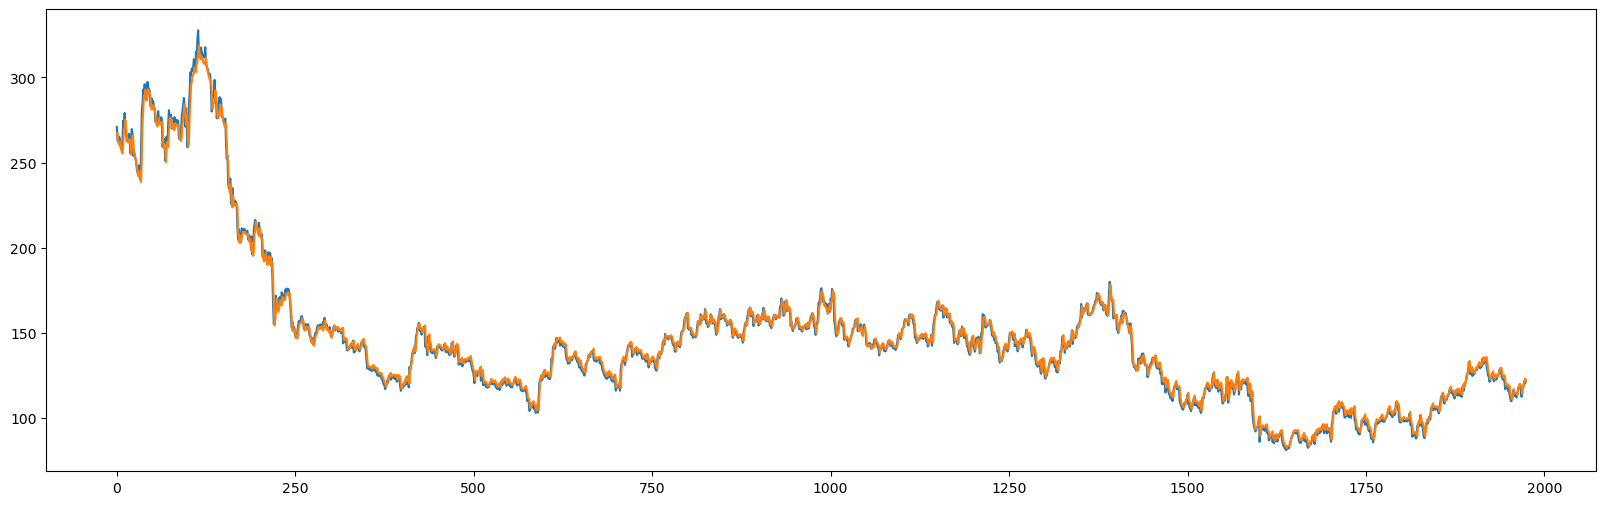

In [44]:
plt.figure(figsize=(20,6))
plt.plot(actual_y, label='actual_price')
plt.plot(pred, label='pred_price')

### Predicting Stock Prices using LSTM

In [145]:
import tensorflow as tf

forecasting_model = tf.keras.models.Sequential()
forecasting_model.add(tf.keras.layers.Input(shape=(60,1)))
forecasting_model.add(tf.keras.layers.LSTM(50))
forecasting_model.add(tf.keras.layers.Dense(1))

forecasting_model.compile(loss='mean_squared_error', optimizer='Adam')

In [146]:
forecasting_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = forecasting_model.fit(train_X, train_y, epochs=100, callbacks=[earlystopping])

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4718
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0274
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0229
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0183
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0154
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0157
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0134
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0131
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0109
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

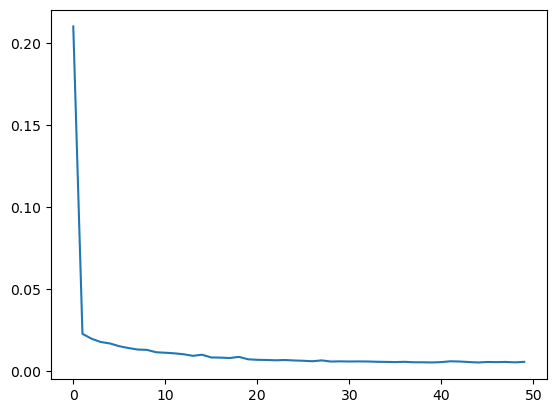

In [148]:
plt.plot(history.history['loss'])

In [149]:
pred = scaler.inverse_transform(forecasting_model.predict(train_X))
actual_y = scaler.inverse_transform(train_y.reshape(-1,1))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


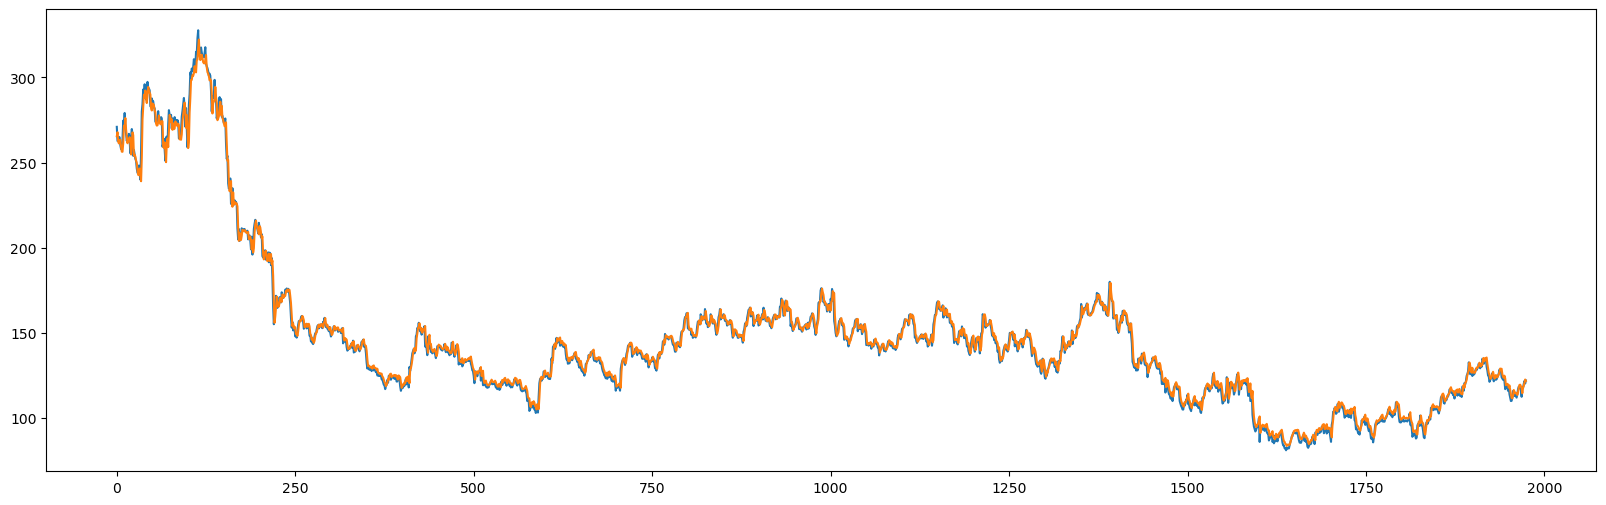

In [150]:
plt.figure(figsize=(20,6))
plt.plot(actual_y, label='actual_price')
plt.plot(pred, label='pred_price')

### Predicting Stock Prices using GRU

In [151]:
import tensorflow as tf

forecasting_model = tf.keras.models.Sequential()
forecasting_model.add(tf.keras.layers.Input(shape=(60,1)))
forecasting_model.add(tf.keras.layers.GRU(50))
forecasting_model.add(tf.keras.layers.Dense(1))

forecasting_model.compile(loss='mean_squared_error', optimizer='Adam')

In [152]:
forecasting_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = forecasting_model.fit(train_X, train_y, epochs=100, callbacks=[earlystopping])

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3209
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0111
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0103
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0087
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0084
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0076
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0073
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0086
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0071
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0061
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0072
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0064
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0058
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0062
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

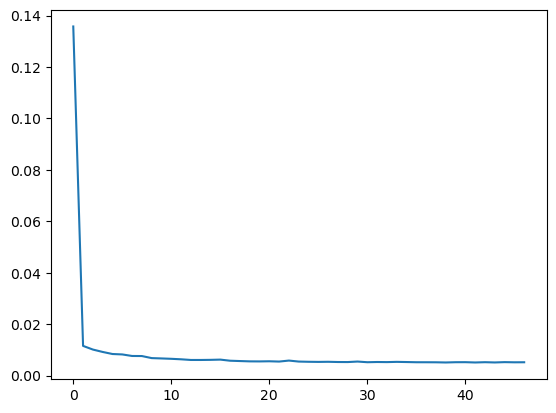

In [154]:
plt.plot(history.history['loss'])

In [155]:
pred = scaler.inverse_transform(forecasting_model.predict(train_X))
actual_y = scaler.inverse_transform(train_y.reshape(-1,1))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


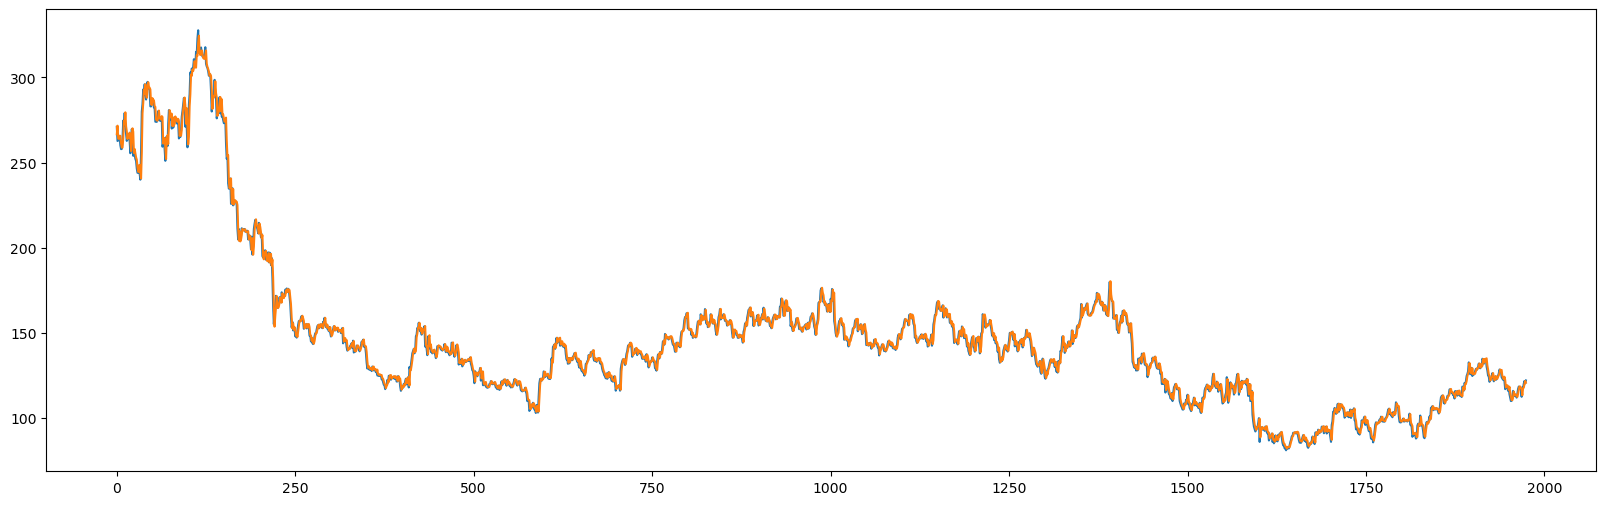

In [156]:
plt.figure(figsize=(20,6))
plt.plot(actual_y, label='actual_price')
plt.plot(pred, label='pred_price')

## Sentiment Analysis

In [46]:
! pip install tensorflow_datasets

  Obtaining dependency information for tensorflow_datasets from https://files.pythonhosted.org/packages/8f/50/52fa3d41d20c687d81f66338bc1b0e71a27a3390ecfa8f5bc212a10135e1/tensorflow_datasets-4.9.6-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree from https://files.pythonhosted.org/packages/08/e2/4c29cb9876456517f21979ddcbb6048f28a3b52c61aa9d14d42adafcdca4/dm_tree-0.1.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/e2/13/3cf4ac5b3403f3456e645c4533883ef67b1bb0c72e56b79c707715f57a74/immutabledict-4.2.0-py3-none-any.whl.metadata
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for simple-parsing from https://files.pythonhosted.org/packages/b0/12/c657047c11a47e1c3e51bdc26bd6f2661a268fd0384bd8ed56b227530486/simple_parsing-0.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-meta

In [47]:
import tensorflow_datasets as tfds

In [48]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

2024-08-05 11:07:02.608818: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /Users/abhilashchauhan/tensorflow_datasets/imdb_reviews/plain_text/incomplete.9HH5RD_1.0.0/imdb_revi…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /Users/abhilashchauhan/tensorflow_datasets/imdb_reviews/plain_text/incomplete.9HH5RD_1.0.0/imdb_revi…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /Users/abhilashchauhan/tensorflow_datasets/imdb_reviews/plain_text/incomplete.9HH5RD_1.0.0/imdb_revi…

Dataset imdb_reviews downloaded and prepared to /Users/abhilashchauhan/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [91]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [92]:
for text, sentiment in train_dataset.take(2):
    print(text)
    print(sentiment)
    print('*'*100)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
****************************************************************************************************
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things inclu

### Building Encoding (Text to Numbers)

In [93]:
Vocab_size = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=Vocab_size)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [94]:
vocab = np.array(encoder.get_vocabulary())
vocab

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but',
       'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be',
       'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so',
       'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some',
       'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she',
       'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really',
       'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we',
       'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because',
       'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most',
       'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could',
       'way', 'them', 'any', 'too', 'after', 'characters', 'think',
       'watch', 'two', 'many', 'being', 'seen', 'character', 'never',
       'little', 'acting', 'where', 'plot', 'best', 'love', 'did'

In [95]:
encoded_example = encoder(text)

In [ ]:
text

In [96]:
encoded_example

<tf.Tensor: shape=(112,), dtype=int64, numpy=
array([ 10,  26,  75, 617,   6, 776,   1, 299,  95,  19,  11,   7, 604,
       662,   6,   4,   1,   5, 180, 571,  63,   1, 107,   1,   3,   1,
        21,   2,   1,   3, 252,  41,   1,   4, 169, 186,  21,  11,   1,
        10,   1,   1,  80,   2,  20,  14,   1,   2, 114, 943,  14,   1,
         1, 594,   3, 356, 180, 446,   6, 596,  19,  17,  57,   1,   5,
        49,  14,   1,  98,  42, 134,  10, 934,  10, 194,  26,   1, 171,
         5,   2,  20,  19,  10, 284,   2,   1,   5,   9,   3, 279,  41,
       446,   6, 596,   5,  30, 200,   1, 201,  99, 146,   1,  16, 229,
       329,  10, 175, 368,  11,  20,  31,  32])>

In [97]:
train_dataset = train_dataset.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [102]:
model = tf.keras.models.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()), 
        output_dim=(64),
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [99]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_6 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             metrics=['accuracy'])

In [104]:
model.fit(train_dataset, epochs=10, validation_data=test_dataset, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 225ms/step - accuracy: 0.5130 - loss: 0.8556 - val_accuracy: 0.5084 - val_loss: 0.7131
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 252s 322ms/step - accuracy: 0.6147 - loss: 0.6579 - val_accuracy: 0.5432 - val_loss: 0.6858
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 233ms/step - accuracy: 0.5986 - loss: 0.6734 - val_accuracy: 0.6228 - val_loss: 0.6486
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.6981 - loss: 0.6031 - val_accuracy: 0.7097 - val_loss: 0.5688
Epoch 5/10
238/782 ━━━━━━━━━━━━━━━━━━━━ 1:48 200ms/step - accuracy: 0.7542 - loss: 0.5351

KeyboardInterrupt: 

<_TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [111]:
for text, labels in train_dataset.take(1):
    pass

In [114]:
pred = tf.sigmoid(model.predict(train_dataset.take(1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [139]:
pred_labels = np.array([1 if p > 0.62 else 0 for p in pred])

In [140]:
labels

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0])>

In [141]:
pred_labels

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [142]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.59      0.68      0.63        19

    accuracy                           0.53        32
   macro avg       0.50      0.50      0.49        32
weighted avg       0.51      0.53      0.52        32

